# Reunión
* todero aseador
* valor cuota administración  aumenta solo 7,5%
* cuota extraordinaría   2.533.650.  Tengo el mejor apartamento del conjunto   2.46
* 23 de Abril siguiente reunión

# Plan
* carga archivos
* seleccion variables
* clasificaciòn variable
  * definiciones variables categoricas, validar varios escenarios
* construccion dataset
 * se incluye el tratamiento de la información de texto
* preparaciòn de variables dependientes
* aplicación de varias tecnicas y escenarios por variable dependiente
  

# Filtros
* Estado (status) Cerrado
* con información de Failure Code


In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 800)

In [3]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import gensim
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
import nltk

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
import json, re
from joblib import dump,load

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier

In [6]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminamos comas y /
    texto = re.sub(r',', ' ', str(texto))
    texto = re.sub(r'/', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [7]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("spanish"))
def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

stemmer = SnowballStemmer("spanish")
def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stemmer = SnowballStemmer("spanish")
def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

In [9]:
def Limpiar_Caracter(texto):
    if len(texto) == 1 or texto == ',':
        texto = ''
    else:
        texto = texto
    return texto

In [10]:
#modelo topicos
### Funciones para modelo de tópicos
def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts,bigram_mod,trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def impresionTopicos(mod,nPalabras,nTopicos):
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    for topico in topicos:
        print(topico)    
        
def impresionTopicosLimp(mod,nPalabras,nTopicos):
    #Impresion limpia de Tópicos
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    i=0
    for topico in topicos:
        i=i+1
        textoAux = re.sub(r'\W', ' ', str(topico))
        textoAux = re.sub(r'\s+[a-zA-Z]\s+', ' ', textoAux)
        textoAux = re.sub(r'[0-9]', ' ', textoAux)
        textoAux = re.sub(r'\s+', ' ', textoAux, flags=re.I)
        print(str(i),textoAux)

In [11]:
def disbribucionProbTopicos(arr_text):
    bow_comentario = diccionario.doc2bow(arr_text)
    distribucion_noticia = lda[bow_comentario]
    print(len(distribucion_noticia))
    print(distribucion_noticia)
    print (dict(distribucion_noticia))
    df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
    print(df_aux)
    df_plan=pd.DataFrame(index=range(0,numeroTopicos))
    df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
    df_plan.fillna(0,inplace=True)
    df_plan.set_index('ind', inplace=True)
    print(df_plan['prob'])
    #return [x[1] for x in distribucion_noticia]    
    return df_plan['prob']

# Carga de Archivos
* maximo.classification.csv
* maximo.classstructure.csv
* maximo.failurecode.csv
* maximo.incident.csv
* maximo.longdescription.csv

In [13]:
df_independientes= pd.read_csv('fuente2/maximo.incident_4_tablas.csv',sep='|', header = 0)
#df_dependientes= pd.read_csv('fuente2/maximo.incident_2_tablas.csv',sep='|', header = 0)

In [12]:
df_dependientes= pd.read_csv('fuente2/maximo.incident_2_tablas.csv',sep='|', header = 0)

In [13]:
# validación filtros
len(df_independientes)

1519015

In [14]:
len(df_independientes[df_independientes['STATUS']=='CERRADO'])

1519015

In [15]:
len(df_independientes[df_independientes['FAILURECODE'].notnull()])

1519015

In [16]:
# validar si estan las columnas seleccionadas

In [17]:
camp_approbados=['ASSETSITEID','ASSIGNEDOWNERGROUP','CL_C_TIPO','CL_SERVICIO','CL_SER_AFEC',
                'DIAGNOSTICADO','EXTERNALSYSTEM','FAILURECODE','FR1CODE','HASACTIVITY','HASLD','IMPACT','INCCARGAPRIORIDAD','INCEXCLUIR','INCEXCLUIR_ENLD',
                'INC_ALARMA','INTERNALPRIORITY','MUN100','ONCALLOWNERGROUP','ORIGRECORDCLASS','OUTAGEDURATION','OWNER','PROBLEMCODE',
                'PROVEEDORES','REGIONAL','SRDATOS','SRINTERNET','SRTV','SRVOZ','TICKETID','TICKET_EXT','TIPOCOMUNICADO','URGENCY','WORKTYPE',
                'FR2CODE','CLASSSTRUCTUREID','INCSERVICE','CLASSIFICATIONID']
#muchos blancos, pocos ejemplos
camp_texto=['CL_C_DESC_AFECTACION','CL_INC_IMPACTO','C_CL_AFECTA','DESCRIPCION_TECNICA','DESCRIPTION','INCMCANCEL','INCMESTADO','INCMEXCLUSION',
            'INCSOLUCION']

In [18]:
# validacíon nuevos campos

In [19]:
# identificación de subindices de columna de cada conjunto de datos

In [20]:
df_independientes.columns[:52]
#posicion 51

Index(['ASSETSITEID', 'ASSIGNEDOWNERGROUP', 'CHANGEBY', 'CL_C_TIPO',
       'CL_SERVICIO', 'CL_SER_AFEC', 'CREATEDBY', 'DIAGNOSTICADO',
       'EXTERNALSYSTEM', 'FAILURECODE', 'FR1CODE', 'HASACTIVITY', 'HASLD',
       'IMPACT', 'INCCARGAPRIORIDAD', 'INCEXCLUIR', 'INCEXCLUIR_ENLD',
       'INC_ALARMA', 'INTERNALPRIORITY', 'LANGCODE', 'MUN100',
       'ONCALLOWNERGROUP', 'ORIGRECORDCLASS', 'OUTAGEDURATION', 'OWNER',
       'PROBLEMCODE', 'PROVEEDORES', 'REGIONAL', 'SRDATOS', 'SRINTERNET',
       'SRTV', 'SRVOZ', 'TICKETID', 'TICKET_EXT', 'TIPOCOMUNICADO', 'URGENCY',
       'WORKTYPE', 'FR2CODE', 'CLASSSTRUCTUREID', 'INCSERVICE',
       'CLASSIFICATIONID', 'CL_C_DESC_AFECTACION', 'CL_INC_IMPACTO',
       'C_CL_AFECTA', 'DESCRIPCION_TECNICA', 'DESCRIPTION', 'INCMCANCEL',
       'INCMESTADO', 'INCMEXCLUSION', 'INCSOLUCION', 'STATUS', 'A'],
      dtype='object')

In [21]:
df_independientes.columns[51]

'A'

In [22]:
df_independientes.columns[51:60]
#posicion 59

Index(['A', 'FAILURECODE.1', 'DESCRIPTION.1', 'ORGID', 'FAILURECODEID',
       'LANGCODE.1', 'HASLD.1', 'ROWSTAMP', 'A.1'],
      dtype='object')

In [23]:
df_independientes.columns[59]

'A.1'

In [24]:
df_independientes.columns[59:91]
#posicion 90

Index(['A.1', 'CLASSSTRUCTUREID.1', 'DESCRIPTION.2', 'GENASSETDESC', 'ORGID.1',
       'PARENT', 'CLASSIFICATIONID.1', 'USECLASSINDESC', 'TYPE', 'SITEID',
       'CLASSSTRUCTUREUID', 'HASCHILDREN', 'LANGCODE.2', 'HASLD.2',
       'ROWSTAMP.1', 'SHOWINASSETTOPO', 'PLUSPISGLOBAL', 'PLUSPROLLDOWN',
       'PLUSPROLLDOWNATTR', 'PLUSPINSERTCUSTOMER', 'SHOWINTOPO',
       'PMCOMTOPOIMG', 'DISCLASSIFICATION', 'CLASSIFICATIONGROUPID',
       'COMMODITYGROUP', 'COMMODITY', 'PERSONGROUP', 'PERSON', 'OWNER.1',
       'INDICATEDPRIORITY', 'SHOWINIA', 'A.2'],
      dtype='object')

In [25]:
df_independientes.columns[90]

'A.2'

In [26]:
len(df_independientes.columns)

99

In [27]:
df_independientes.columns[90:99]
#final posicion 98

Index(['A.2', 'CLASSIFICATIONID.2', 'DESCRIPTION.3', 'ORGID.2', 'SITEID.1',
       'CLASSIFICATIONUID', 'ROWSTAMP.2', 'HASLD.3', 'LANGCODE.3'],
      dtype='object')

In [28]:
df_independientes.columns[98]

'LANGCODE.3'

In [29]:
# posiciones 51 ,59 ,90 ,98

# Validación Tabla principal

In [30]:
colTab1=['ASSETSITEID', 'ASSIGNEDOWNERGROUP', 'CHANGEBY', 'CL_C_TIPO','CL_SERVICIO', 'CL_SER_AFEC', 'CREATEDBY', 'DIAGNOSTICADO',
'EXTERNALSYSTEM', 'FAILURECODE', 'FR1CODE', 'HASACTIVITY', 'HASLD','IMPACT', 'INCCARGAPRIORIDAD', 'INCEXCLUIR', 'INCEXCLUIR_ENLD',
'INC_ALARMA', 'INTERNALPRIORITY', 'MUN100','ONCALLOWNERGROUP', 'ORIGRECORDCLASS', 'OUTAGEDURATION', 
'PROBLEMCODE', 'PROVEEDORES', 'REGIONAL', 'SRDATOS', 'SRINTERNET','SRTV', 'SRVOZ', 'TICKETID', 'TICKET_EXT', 'TIPOCOMUNICADO', 'URGENCY',
'WORKTYPE', 'FR2CODE', 'INCSERVICE','CLASSIFICATIONID', 'CL_C_DESC_AFECTACION', 'CL_INC_IMPACTO',
'C_CL_AFECTA', 'DESCRIPCION_TECNICA', 'DESCRIPTION', 'INCMCANCEL','INCMESTADO', 'INCMEXCLUSION', 'INCSOLUCION']

## Validación tabla relacionada 1
## FailureCode

In [31]:
df_independientes[df_independientes.columns[51:60]]

,A,FAILURECODE.1,DESCRIPTION.1,ORGID,FAILURECODEID,LANGCODE.1,HASLD.1,ROWSTAMP,A.1
0,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
1,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
2,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
3,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
4,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
...,...,...,...,...,...,...,...,...,...
1519010,----------,PRUEBAS DE SERVICIOS MOVILES,NaN,CLARO,53936,ES,0,16744512005,----------
1519011,----------,BACKBONE TRANSMISION SDH/DWDM/OTN,Backbone Transmision Sdh/Dwdm/Otn,CLARO,42400,ES,0,6247193933,----------
1519012,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------
1519013,----------,FALLA_SONDAS_CRC,Falla_Sondas_Crc,CLARO,43401,ES,0,6247194101,----------


In [32]:
df_independientes[df_independientes.columns[51:60]]['FAILURECODE.1'].value_counts()

ACCESO_ESTACION_BASE            503860
ACCESO RED COAXIAL              335819
FIBRA OPTICA                    219692
PRUEBAS DE SERVICIOS MOVILES     80920
FALLA_SONDAS_CRC                 55854
                                 ...  
FAL_ASO_SER_CAN_LIN_HAC_CEN          6
CORE_TV_ENCODER                      5
CORE_ROAMING_CANAL_SCCP              4
CORE_TV_CTI                          2
CORE VOZ MOVIL                       1
Name: FAILURECODE.1, Length: 104, dtype: int64

In [33]:
df_independientes[df_independientes.columns[51:60]]['DESCRIPTION.1'].value_counts()

Fallas asociadas a Estaciones Base Celulares                503860
Acceso Red Coaxial                                          335819
Fibra Optica                                                219692
Falla_Sondas_Crc                                             55854
Requerimientos Internos                                      34996
                                                             ...  
FALLAS ASOCIADAS A SERVICIO CANALES LINEALES HACIA CENAM         6
Fallas Asociadas A Encoder                                       5
Fallas Asociadas A Canal Sccp                                    4
Fallas Asociadas A Cti                                           2
Core Voz Movil                                                   1
Name: DESCRIPTION.1, Length: 97, dtype: int64

In [34]:
# no aporta esta tabla

In [35]:
# validar nulos

In [36]:
len(df_independientes[df_independientes['FAILURECODE.1'].isnull()])

0

## Validación tabla relacionada 2
## CLASSSTRUCTUREID

In [37]:
df_independientes.columns[59:91]

Index(['A.1', 'CLASSSTRUCTUREID.1', 'DESCRIPTION.2', 'GENASSETDESC', 'ORGID.1',
       'PARENT', 'CLASSIFICATIONID.1', 'USECLASSINDESC', 'TYPE', 'SITEID',
       'CLASSSTRUCTUREUID', 'HASCHILDREN', 'LANGCODE.2', 'HASLD.2',
       'ROWSTAMP.1', 'SHOWINASSETTOPO', 'PLUSPISGLOBAL', 'PLUSPROLLDOWN',
       'PLUSPROLLDOWNATTR', 'PLUSPINSERTCUSTOMER', 'SHOWINTOPO',
       'PMCOMTOPOIMG', 'DISCLASSIFICATION', 'CLASSIFICATIONGROUPID',
       'COMMODITYGROUP', 'COMMODITY', 'PERSONGROUP', 'PERSON', 'OWNER.1',
       'INDICATEDPRIORITY', 'SHOWINIA', 'A.2'],
      dtype='object')

In [38]:
df_independientes[df_independientes.columns[59:91]]

,A.1,CLASSSTRUCTUREID.1,DESCRIPTION.2,GENASSETDESC,ORGID.1,PARENT,CLASSIFICATIONID.1,USECLASSINDESC,TYPE,SITEID,CLASSSTRUCTUREUID,HASCHILDREN,LANGCODE.2,HASLD.2,ROWSTAMP.1,SHOWINASSETTOPO,PLUSPISGLOBAL,PLUSPROLLDOWN,PLUSPROLLDOWNATTR,PLUSPINSERTCUSTOMER,SHOWINTOPO,PMCOMTOPOIMG,DISCLASSIFICATION,CLASSIFICATIONGROUPID,COMMODITYGROUP,COMMODITY,PERSONGROUP,PERSON,OWNER.1,INDICATEDPRIORITY,SHOWINIA,A.2
0,----------,I1286,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA,0.0,NaN,INC1006,CONTINUA,1.0,NaN,NaN,7672500.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FOACCESO,NaN,NaN,NaN,0.0,----------
1,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
2,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
3,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
4,----------,INC1002,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION,0.0,NaN,INC001,PERFORMANCE/CALIDAD/DEGRADACION,1.0,NaN,NaN,7679500.0,1.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FOPERFORMANCE,NaN,NaN,NaN,0.0,----------
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519010,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,NaN,INC1005,RUTINA,1.0,NaN,NaN,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSTCARE,NaN,NaN,NaN,0.0,----------
1519011,----------,4251,SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION,0.0,NaN,3838,NOTIFICACION/SIN AFECTACION,1.0,NaN,NaN,12086500.0,0.0,EN,0.0,1.168943e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FO_SDH,NaN,NaN,NaN,0.0,----------
1519012,----------,I1131,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION,0.0,NaN,INC1001,PERDIDA DE GESTION,1.0,NaN,NaN,7679000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,FRONTOFFICE,NaN,NaN,NaN,0.0,----------
1519013,----------,I1136,SERVICIOS MOVILES \ SONDA \ CRC,0.0,NaN,INC1004,CRC,0.0,NaN,NaN,7712000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CUSCARSO,NaN,NaN,NaN,0.0,----------


In [39]:
df_independientes[df_independientes.columns[59:91]].columns

Index(['A.1', 'CLASSSTRUCTUREID.1', 'DESCRIPTION.2', 'GENASSETDESC', 'ORGID.1',
       'PARENT', 'CLASSIFICATIONID.1', 'USECLASSINDESC', 'TYPE', 'SITEID',
       'CLASSSTRUCTUREUID', 'HASCHILDREN', 'LANGCODE.2', 'HASLD.2',
       'ROWSTAMP.1', 'SHOWINASSETTOPO', 'PLUSPISGLOBAL', 'PLUSPROLLDOWN',
       'PLUSPROLLDOWNATTR', 'PLUSPINSERTCUSTOMER', 'SHOWINTOPO',
       'PMCOMTOPOIMG', 'DISCLASSIFICATION', 'CLASSIFICATIONGROUPID',
       'COMMODITYGROUP', 'COMMODITY', 'PERSONGROUP', 'PERSON', 'OWNER.1',
       'INDICATEDPRIORITY', 'SHOWINIA', 'A.2'],
      dtype='object')

In [40]:
df_independientes[df_independientes.columns[59:91]]['USECLASSINDESC'].value_counts()
#opcionada

1.0    1480231
0.0      37848
Name: USECLASSINDESC, dtype: int64

In [41]:
df_independientes[df_independientes.columns[59:91]]['HASCHILDREN'].value_counts()
#opcionada

0.0    1434269
1.0      83810
Name: HASCHILDREN, dtype: int64

In [42]:
df_independientes[df_independientes.columns[59:91]]['PERSONGROUP'].value_counts()
#validar

FRONTOFFICE              282620
FOACCESO                 265575
FOPERFORMANCE            222114
FOHFC                    153876
FRONTCCI                 129720
CUSTCARE                  87943
FOINFRAESTRUCTURA         78208
FOPERFOR                  54605
CUSCARSO                  37829
FOCORE                    31846
EMPFO                     26146
FOGESTINTERMITENCIAS      25271
NEGFO                     21400
CC_SON_NOC                17870
FO_SDH                    17277
FOSERVICIO                15888
FOTV                      15436
FOCABLE                   11513
CCARE_IE                   5857
GSGR                       2368
EMER_BO_IP                 2033
NOC TELEFONIA              1799
AMDOCS                     1686
CNOC_MOVIL                 1406
BO_ALAM_HOG_CABLE          1101
COL-FJ-SD-RED_EXTERNA       677
FOSD                        571
PERFOR_PRUEBA               409
BO_ALAM_HOG                 264
FOENERGI                    132
MAXIMO_NETCOOL              126
BOCORCPD

##### Preselección variables

In [43]:
colTab2=['PERSONGROUP','HASCHILDREN','USECLASSINDESC','DESCRIPTION.2']

In [44]:
df_independientes[colTab2]

,PERSONGROUP,HASCHILDREN,USECLASSINDESC,DESCRIPTION.2
0,FOACCESO,0.0,1.0,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA
1,CUSTCARE,0.0,1.0,SERVICIOS MOVILES \ PRUEBA \ RUTINA
2,CUSTCARE,0.0,1.0,SERVICIOS MOVILES \ PRUEBA \ RUTINA
3,CUSTCARE,0.0,1.0,SERVICIOS MOVILES \ PRUEBA \ RUTINA
4,FOPERFORMANCE,1.0,1.0,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION
...,...,...,...,...
1519010,CUSTCARE,0.0,1.0,SERVICIOS MOVILES \ PRUEBA \ RUTINA
1519011,FO_SDH,0.0,1.0,SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION
1519012,FRONTOFFICE,0.0,1.0,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION
1519013,CUSCARSO,0.0,0.0,SERVICIOS MOVILES \ SONDA \ CRC


### Revisión,  tabla 3

In [45]:
df_independientes[df_independientes.columns[90:98]]

,A.2,CLASSIFICATIONID.2,DESCRIPTION.3,ORGID.2,SITEID.1,CLASSIFICATIONUID,ROWSTAMP.2,HASLD.3
0,----------,CONTINUA,CONTINUA,NaN,NaN,3235000.0,6.603774e+09,0.0
1,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
2,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
3,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
4,----------,PERFORMANCE/CALIDAD/DEGRADACION,PERFORMANCE/CALIDAD/DEGRADACION,NaN,NaN,3233000.0,6.603774e+09,0.0
...,...,...,...,...,...,...,...,...
1519010,----------,RUTINA,RUTINA,NaN,NaN,2544500.0,6.603774e+09,0.0
1519011,----------,NOTIFICACION/SIN AFECTACION,NOTIFICACION/SIN AFECTACION,NaN,NaN,6248500.0,1.135247e+10,0.0
1519012,----------,PERDIDA DE GESTION,PERDIDA DE GESTION,NaN,NaN,3509000.0,6.603774e+09,0.0
1519013,----------,CRC,CRC,NaN,NaN,3469500.0,6.603773e+09,0.0


In [46]:
df_independientes[df_independientes.columns[90:98]].columns

Index(['A.2', 'CLASSIFICATIONID.2', 'DESCRIPTION.3', 'ORGID.2', 'SITEID.1',
       'CLASSIFICATIONUID', 'ROWSTAMP.2', 'HASLD.3'],
      dtype='object')

In [47]:
df_independientes[df_independientes.columns[90:98]]['DESCRIPTION.3'].value_counts()
#opcional texto

CONTINUA                       303745
OFENSOR AGUDO                  154737
ALARMA DE ENERGIA              141240
RUTINA                          75065
SENAL DEFICIENTE                64684
                                ...  
ALARMA OPTICO LIGHTPLEX OUT         1
TRAFFRNC14VEN                       1
CONEXION WPS                        1
CABLE FTTH                          1
OCSDM                               1
Name: DESCRIPTION.3, Length: 438, dtype: int64

In [48]:
coltab3=['CLASSIFICATIONID.2', 'DESCRIPTION.3']

# observaciones
* traer del script anterior
* idioma LANGCODE, no aplica

### Clasificación variables seleccionadas

In [49]:
var_num=['IMPACT','INCCARGAPRIORIDAD','INTERNALPRIORITY','OUTAGEDURATION','URGENCY']
var_texto=['CL_C_DESC_AFECTACION','C_CL_AFECTA','DESCRIPTION','INCMEXCLUSION','INCSOLUCION']
var_texto_desc=['CL_INC_IMPACTO','INCMCANCEL']
var_bool=['DIAGNOSTICADO','HASACTIVITY','HASLD','INCEXCLUIR','INCEXCLUIR_ENLD','INC_ALARMA','MUN100','SRDATOS','SRINTERNET','SRTV','SRVOZ',
         #tab2
         'HASCHILDREN','USECLASSINDESC'
         ]
var_cat=['ASSIGNEDOWNERGROUP','CL_C_TIPO','CL_SERVICIO','CL_SER_AFEC','EXTERNALSYSTEM','FR1CODE','ONCALLOWNERGROUP','ORIGRECORDCLASS','PROBLEMCODE','PROVEEDORES','REGIONAL','TICKET_EXT',
        'TIPOCOMUNICADO','WORKTYPE','FR2CODE','INCSERVICE','CLASSIFICATIONID','DESCRIPCION_TECNICA','INCMESTADO',
        #tab2
         'PERSONGROUP','DESCRIPTION.2'
        ]
var_excluir=['ASSETSITEID','CHANGEBY','CREATEDBY']
var_etiqueta=['FAILURECODE','TICKETID']

In [50]:
len(colTab1)

47

In [51]:
len(var_num+var_texto+var_bool+var_cat+var_excluir+var_etiqueta)

49

### Analisis de etiquetas
* para determinar el manejo de categoricas

In [14]:
df_independientes['FAILURECODE'].value_counts()

ACCESO_ESTACION_BASE            503860
ACCESO RED COAXIAL              335819
FIBRA OPTICA                    219692
PRUEBAS DE SERVICIOS MOVILES     80920
FALLA_SONDAS_CRC                 55854
                                 ...  
FAL_ASO_SER_CAN_LIN_HAC_CEN          6
CORE_TV_ENCODER                      5
CORE_ROAMING_CANAL_SCCP              4
CORE_TV_CTI                          2
CORE VOZ MOVIL                       1
Name: FAILURECODE, Length: 104, dtype: int64

<AxesSubplot:>

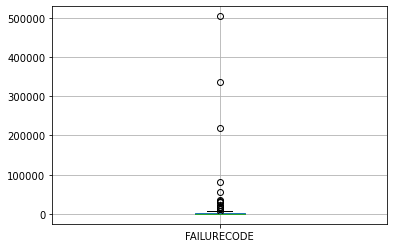

In [15]:
df_independientes['FAILURECODE'].value_counts().to_frame().boxplot()

In [16]:
df_independientes['FAILURECODE'].value_counts().to_frame().describe()

,FAILURECODE
count,104.000000
mean,14605.913462
std,62999.711366
min,1.000000
25%,25.000000
50%,175.000000
75%,3197.500000
max,503860.000000


In [17]:
#opcion clasificar para más de 100 casos

In [18]:
et_failurecode=df_independientes['FAILURECODE'].value_counts().to_frame()

In [19]:
len(et_failurecode[et_failurecode['FAILURECODE']>=100])

59

In [20]:
len(et_failurecode[et_failurecode['FAILURECODE']<100])

45

In [21]:
et_failurecode

,FAILURECODE
ACCESO_ESTACION_BASE,503860
ACCESO RED COAXIAL,335819
FIBRA OPTICA,219692
PRUEBAS DE SERVICIOS MOVILES,80920
FALLA_SONDAS_CRC,55854
...,...
FAL_ASO_SER_CAN_LIN_HAC_CEN,6
CORE_TV_ENCODER,5
CORE_ROAMING_CANAL_SCCP,4
CORE_TV_CTI,2


In [22]:
#categiricas con top, como parámetro

In [23]:
et_failurecodeV2=df_dependientes[['TICKETID','FAILURECODE.1']].drop_duplicates()

In [24]:
et_failurecodeV2=et_failurecodeV2['FAILURECODE.1'].value_counts().to_frame()

In [25]:
et_failurecodeV2

,FAILURECODE.1
ACCESO_ESTACION_BASE,503909
ACCESO RED COAXIAL,335895
FIBRA OPTICA,219736
PRUEBAS DE SERVICIOS MOVILES,80922
FALLA_SONDAS_CRC,55884
...,...
FAL_ASO_SER_CAN_LIN_HAC_CEN,6
CORE_TV_ENCODER,5
CORE_ROAMING_CANAL_SCCP,4
CORE_TV_CTI,2


In [26]:
len(et_failurecodeV2[et_failurecodeV2['FAILURECODE.1']>=100])

59

In [27]:
len(et_failurecodeV2[et_failurecodeV2['FAILURECODE.1']<100])

45

## PROBLEM

In [28]:
df_dependientes

,FAILURECODE,TYPE,TICKETCLASS,A,TICKETID,FAILURECODE.1
0,SIT_PARC_3G+4G,PROBLEM,INCIDENT,---,INC1972953,ACCESO_ESTACION_BASE
1,T_CONEC_CABLES/CONECT,CAUSE,INCIDENT,---,INC1972953,ACCESO_ESTACION_BASE
2,REPAR,REMEDY,INCIDENT,---,INC1972953,ACCESO_ESTACION_BASE
3,NaN,NaN,NaN,---,INC921809,ACCESO_ESTACION_BASE
4,NaN,NaN,NaN,---,INC922198,ACCESO_ESTACION_BASE
...,...,...,...,...,...,...
4543632,NOT_ENERGIA,PROBLEM,INCIDENT,---,INC6086600,ACCESO_ESTACION_BASE
4543633,CERT_ALARMAS,REMEDY,INCIDENT,---,INC6086600,ACCESO_ESTACION_BASE
4543634,REEMPLAZAR,REMEDY,INCIDENT,---,INC6090125,ACCESO RED COAXIAL
4543635,AMPLIFICADOR BHA,PROBLEM,INCIDENT,---,INC6090125,ACCESO RED COAXIAL


In [29]:
et_problemV2=df_dependientes[df_dependientes['TYPE']=='PROBLEM']['FAILURECODE'].value_counts().to_frame()
et_problemV2

,FAILURECODE
NOT_ENERGIA,186784
CABLE AEREO,155054
SIN FALLA O&M ACCESO,91480
SIT_TOT,79385
SIT_PARC_3G,72833
...,...
SON_IE_FM,1
CC 0C11H,1
ALARMA VAS CLOUD 405140005,1
ALARMA CRITICAL FAULT,1


<AxesSubplot:>

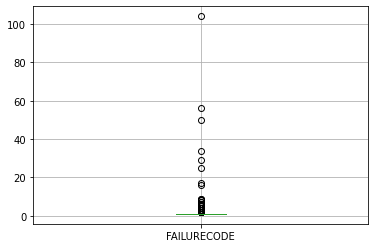

In [30]:
et_problemV2['FAILURECODE'].value_counts().to_frame().boxplot()

In [31]:
len(et_problemV2[et_problemV2['FAILURECODE']>=100])

278

In [32]:
len(et_problemV2[et_problemV2['FAILURECODE']<100])

533

In [33]:
## Etiquetas sin ejemplos se unifican
# se pueden clasificar o agrupar las etiquetas?  esto puede mejorar los resultados y luego hacer zoom con otros modelos
# 100 es un parámetro también del modelo

## CAUSE

In [34]:
et_causaV2=df_dependientes[df_dependientes['TYPE']=='CAUSE']['FAILURECODE'].value_counts().to_frame()
et_causaV2

,FAILURECODE
DETERIORIO VIDA UTIL,140362
VERIFICACION DE SENAL COAXIAL,88867
FALLA_ENER_COM_SITIO SIN PLANTA,77520
FALLA_ENER_COM_SITIO CON PLANTA,77019
PRUEBA_RUTINA,68996
...,...
AVERIA DE CORE DE SISTEMA,1
PROBLEMAS_ADMINISTRATIVOS_LOGISTICOS,1
AVERIA-FUGA INDICADOR DE NIVEL DE ACEITE,1
CAPACIDAD-UPLINK INSUFICIENTE,1


<AxesSubplot:>

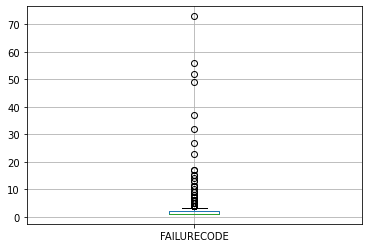

In [35]:
et_causaV2['FAILURECODE'].value_counts().to_frame().boxplot()

In [36]:
len(et_causaV2[et_causaV2['FAILURECODE']>=100])

589

In [37]:
len(et_causaV2[et_causaV2['FAILURECODE']<=100])

787

In [38]:
#más información de los equipos que reciben los eventos, para facilitar la clasificación de las etiquetas

## Remedy

In [39]:
et_remedyV2=df_dependientes[df_dependientes['TYPE']=='REMEDY']['FAILURECODE'].value_counts().to_frame()
et_remedyV2

,FAILURECODE
REEMPLAZAR,286120
RETORNA AC COMERCIAL,200188
VERIFICAR SERVICIO OK,91475
PRUEBA_EX,79568
RES_REM,65789
...,...
CARGA_DE_LICENCIAS,1
CARGA_Y/O_CX_DE_UNIDADES,1
AMPLIACION,1
ACTUALIZACIÓN DE LICENCIAS,1


<AxesSubplot:>

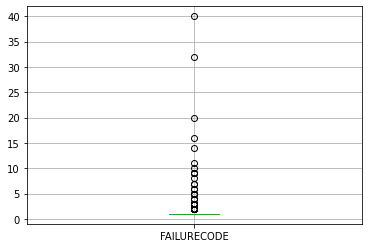

In [40]:
et_remedyV2['FAILURECODE'].value_counts().to_frame().boxplot()

In [41]:
len(et_remedyV2[et_remedyV2['FAILURECODE']>=100])

247

In [42]:
len(et_remedyV2[et_remedyV2['FAILURECODE']<100])

333

In [43]:
# se requiere un modelo muy flexible con pocas restricciones

#### Generación tabla etiquetas

In [44]:
et_fc=df_dependientes[['TICKETID','FAILURECODE.1']].drop_duplicates()
et_fc.columns=['TICKETID','FAILURECODE']
et_fc

,TICKETID,FAILURECODE
0,INC1972953,ACCESO_ESTACION_BASE
3,INC921809,ACCESO_ESTACION_BASE
4,INC922198,ACCESO_ESTACION_BASE
5,INC922276,ACCESO_ESTACION_BASE
6,INC944267,ACCESO_ESTACION_BASE
...,...,...
4543622,INC6079296,BACKBONE TRANSMISION SDH/DWDM/OTN
4543625,INC6079305,ACCESO_ESTACION_BASE
4543628,INC6064631,FALLA_SONDAS_CRC
4543631,INC6086600,ACCESO_ESTACION_BASE


In [45]:
et_rem=df_dependientes[df_dependientes['TYPE']=='REMEDY'][['TICKETID','FAILURECODE']]
et_rem.columns=['TICKETID','REMEDY']
et_rem

,TICKETID,REMEDY
2,INC1972953,REPAR
9,INC924047,CAMBIO_CONFIGURACION_SW
25,INC1972293,REPAR
28,INC1972623,OPERADOR REMOTO RECUPERA FALLA
31,INC1972566,REEMPLAZAR
...,...,...
4543624,INC6079296,RECALIBRAR LAMBDA/CANAL
4543627,INC6079305,RES_REM
4543629,INC6064631,SON_CRC_REEMPLZEQ
4543633,INC6086600,CERT_ALARMAS


In [46]:
et_cau=df_dependientes[df_dependientes['TYPE']=='CAUSE'][['TICKETID','FAILURECODE']]
et_cau.columns=['TICKETID','CAUSE']
et_cau

,TICKETID,CAUSE
1,INC1972953,T_CONEC_CABLES/CONECT
8,INC924047,FALLA_SW
24,INC1972293,T_CONEC_CABLES/CONECT
27,INC1972623,FALLA EN OTRO OPERADOR
30,INC1972566,RUPTURA VANDALISMO / TERCEROS
...,...,...
4543622,INC6079296,INTERMITENCIAS DE TRONCAL O SERVICIO
4543626,INC6079305,A_CEL_HW
4543630,INC6064631,SON_CRC_FALLHWEB
4543631,INC6086600,FALLA_ENER_COM_CERT_ALARMAS


In [47]:
et_prob=df_dependientes[df_dependientes['TYPE']=='PROBLEM'][['TICKETID','FAILURECODE']]
et_prob.columns=['TICKETID','PROBLEM']
et_prob

,TICKETID,PROBLEM
0,INC1972953,SIT_PARC_3G+4G
7,INC924047,CONFIGURACION_SW
23,INC1972293,SIT_PARC_2G
26,INC1972623,CAÍDA 100% RUTA DE INTERCONEXIÓNCAÍDA 100% RUTA DE INTERCONEXIÓN
29,INC1972566,CABLE AEREO
...,...,...
4543623,INC6079296,EQUIPO HUAWEI
4543625,INC6079305,SIT_PARC_3G
4543628,INC6064631,SON_CRC_EBFDS
4543632,INC6086600,NOT_ENERGIA


In [48]:
et_base=et_fc.merge(et_rem, on='TICKETID', how='left')
et_base=et_base.merge(et_cau, on='TICKETID', how='left')
et_base=et_base.merge(et_prob, on='TICKETID', how='left')

In [49]:
et_base

,TICKETID,FAILURECODE,REMEDY,CAUSE,PROBLEM
0,INC1972953,ACCESO_ESTACION_BASE,REPAR,T_CONEC_CABLES/CONECT,SIT_PARC_3G+4G
1,INC921809,ACCESO_ESTACION_BASE,NaN,NaN,NaN
2,INC922198,ACCESO_ESTACION_BASE,NaN,NaN,NaN
3,INC922276,ACCESO_ESTACION_BASE,NaN,NaN,NaN
4,INC944267,ACCESO_ESTACION_BASE,NaN,NaN,NaN
...,...,...,...,...,...
1519338,INC6079296,BACKBONE TRANSMISION SDH/DWDM/OTN,RECALIBRAR LAMBDA/CANAL,INTERMITENCIAS DE TRONCAL O SERVICIO,EQUIPO HUAWEI
1519339,INC6079305,ACCESO_ESTACION_BASE,RES_REM,A_CEL_HW,SIT_PARC_3G
1519340,INC6064631,FALLA_SONDAS_CRC,SON_CRC_REEMPLZEQ,SON_CRC_FALLHWEB,SON_CRC_EBFDS
1519341,INC6086600,ACCESO_ESTACION_BASE,CERT_ALARMAS,FALLA_ENER_COM_CERT_ALARMAS,NOT_ENERGIA


### Procesamiento dataSet

In [88]:
df_independientes.set_index('TICKETID',inplace=True)

In [89]:
df_independientes.fillna(-1,inplace=True)

In [90]:
df_independientes

,ASSETSITEID,ASSIGNEDOWNERGROUP,CHANGEBY,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,CREATEDBY,DIAGNOSTICADO,EXTERNALSYSTEM,FAILURECODE,FR1CODE,HASACTIVITY,HASLD,IMPACT,INCCARGAPRIORIDAD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,INTERNALPRIORITY,LANGCODE,MUN100,ONCALLOWNERGROUP,ORIGRECORDCLASS,OUTAGEDURATION,OWNER,PROBLEMCODE,PROVEEDORES,REGIONAL,SRDATOS,SRINTERNET,SRTV,SRVOZ,TICKET_EXT,TIPOCOMUNICADO,URGENCY,WORKTYPE,FR2CODE,CLASSSTRUCTUREID,INCSERVICE,CLASSIFICATIONID,CL_C_DESC_AFECTACION,CL_INC_IMPACTO,C_CL_AFECTA,DESCRIPCION_TECNICA,DESCRIPTION,INCMCANCEL,INCMESTADO,INCMEXCLUSION,INCSOLUCION,STATUS,A,FAILURECODE.1,DESCRIPTION.1,ORGID,FAILURECODEID,LANGCODE.1,HASLD.1,ROWSTAMP,A.1,CLASSSTRUCTUREID.1,DESCRIPTION.2,GENASSETDESC,ORGID.1,PARENT,CLASSIFICATIONID.1,USECLASSINDESC,TYPE,SITEID,CLASSSTRUCTUREUID,HASCHILDREN,LANGCODE.2,HASLD.2,ROWSTAMP.1,SHOWINASSETTOPO,PLUSPISGLOBAL,PLUSPROLLDOWN,PLUSPROLLDOWNATTR,PLUSPINSERTCUSTOMER,SHOWINTOPO,PMCOMTOPOIMG,DISCLASSIFICATION,CLASSIFICATIONGROUPID,COMMODITYGROUP,COMMODITY,PERSONGROUP,PERSON,OWNER.1,INDICATEDPRIORITY,SHOWINIA,A.2,CLASSIFICATIONID.2,DESCRIPTION.3,ORGID.2,SITEID.1,CLASSIFICATIONUID,ROWSTAMP.2,HASLD.3,LANGCODE.3
TICKETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INC1972953,CLAROMOV,NOCBOLSAINC,MAXADMIN,-1,-1,-1,NETCOOL,0,NETCOOL_CA_FS_II,ACCESO_ESTACION_BASE,T_CONEC_CABLES/CONECT,1,1,2.0,2.02,1,0,0,3.0,EN,0,FOSERVICIO,-1,42.916667,-1,-1,ELECTRICARIBE,COSTA,1,0,0,1,5801074,-1,3.0,CFIBRA,REPAR,I1286,-1,CONTINUA,-1,-1,-1,-1,FAOC: MPACC_T1: Fuera de servicio EB BAR.Riomar-2 H3 UMTS/LTE en Barranquilla EB sin PE. (TX) (Cod),-1,-1,Falla red de energia electrica comercial AC,-1,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1286,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA,0.0,-1.0,INC1006,CONTINUA,1.0,-1.0,-1.0,7672500.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,FOACCESO,-1.0,-1,-1.0,0.0,----------,CONTINUA,CONTINUA,-1.0,-1.0,3235000.0,6.603774e+09,0.0,ES
INC921809,CLAROMOV,CUSTCARE,MAXADMIN,-1,-1,-1,ECM1207B,0,-1,ACCESO_ESTACION_BASE,-1,0,1,3.0,2.01,0,0,0,3.0,ES,0,-1,-1,0.016667,ECM1207B,-1,-1,CENTRO ORIENTE,0,0,0,0,-1,-1,3.0,ME,-1,I1512,-1,RUTINA,-1,-1,-1,-1,CCP:Revisión sondas Medux #724 #753 *229 *230,-1,-1,-1,"Rutina exitosa, sin novedades de fallas",CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,-1.0,INC1005,RUTINA,1.0,-1.0,-1.0,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,CUSTCARE,-1.0,-1,-1.0,0.0,----------,RUTINA,RUTINA,-1.0,-1.0,2544500.0,6.603774e+09,0.0,ES
INC922198,CLAROMOV,CUSTCARE,MAXADMIN,-1,-1,-1,ECF3574BB,0,-1,ACCESO_ESTACION_BASE,-1,0,1,3.0,2.01,0,0,0,3.0,ES,0,-1,-1,0.050000,ECF3574BB,-1,-1,CENTRO ORIENTE,0,0,0,0,-1,-1,3.0,ME,-1,I1512,-1,RUTINA,-1,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1,-1,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,-1.0,INC1005,RUTINA,1.0,-1.0,-1.0,7754000.0,0.0,EN,0.0,1.150020e+10,0.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,CUSTCARE,-1.0,-1,-1.0,0.0,----------,RUTINA,RUTINA,-1.0,-1.0,2544500.0,6.603774e+09,0.0,ES
INC922276,CLAROMOV,CUSTCARE,MAXADMIN,-1,-1,-1,ECF3574BB,0,-1,ACCESO_ESTACION_BASE,-1,0,1,3.0,2.01,0,0,0,3.0,ES,0,-1,-1,0.016667,ECF3574BB,-1,-1,CENTRO ORIENTE,0,0,0,0,-1,-1,3.0,ME,-1,I1512,-1,RUTINA,-1,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1,-1,CERRADO,----------,ACCESO_ESTACION_BASE,Fallas asociadas a Estaciones Base Celulares,CLARO,11826,ES,0,5622415560,----------,I1512,SERVICIOS MOVILES \ PRUEBA \ RUTINA,0.0,-1.0,INC1005,RUTINA,1.0,-1.0,-1.0,7754000.0,0.0,EN,0.0,1.15002

In [91]:
var_num

['IMPACT',
 'INCCARGAPRIORIDAD',
 'INTERNALPRIORITY',
 'OUTAGEDURATION',
 'URGENCY']

In [92]:
var_bool

['DIAGNOSTICADO',
 'HASACTIVITY',
 'HASLD',
 'INCEXCLUIR',
 'INCEXCLUIR_ENLD',
 'INC_ALARMA',
 'MUN100',
 'SRDATOS',
 'SRINTERNET',
 'SRTV',
 'SRVOZ',
 'HASCHILDREN',
 'USECLASSINDESC']

In [93]:
var_cat

['ASSIGNEDOWNERGROUP',
 'CL_C_TIPO',
 'CL_SERVICIO',
 'CL_SER_AFEC',
 'EXTERNALSYSTEM',
 'FR1CODE',
 'ONCALLOWNERGROUP',
 'ORIGRECORDCLASS',
 'PROBLEMCODE',
 'PROVEEDORES',
 'REGIONAL',
 'TICKET_EXT',
 'TIPOCOMUNICADO',
 'WORKTYPE',
 'FR2CODE',
 'INCSERVICE',
 'CLASSIFICATIONID',
 'DESCRIPCION_TECNICA',
 'INCMESTADO',
 'PERSONGROUP',
 'DESCRIPTION.2']

In [94]:
var_texto

['CL_C_DESC_AFECTACION',
 'C_CL_AFECTA',
 'DESCRIPTION',
 'INCMEXCLUSION',
 'INCSOLUCION']

### Numéricas y bool

In [95]:
df_num_fin=df_independientes[var_num+var_bool]
df_num_fin

,IMPACT,INCCARGAPRIORIDAD,INTERNALPRIORITY,OUTAGEDURATION,URGENCY,DIAGNOSTICADO,HASACTIVITY,HASLD,INCEXCLUIR,INCEXCLUIR_ENLD,INC_ALARMA,MUN100,SRDATOS,SRINTERNET,SRTV,SRVOZ,HASCHILDREN,USECLASSINDESC
TICKETID,,,,,,,,,,,,,,,,,,
INC1972953,2.0,2.02,3.0,42.916667,3.0,0,1,1,1,0,0,0,1,0,0,1,0.0,1.0
INC921809,3.0,2.01,3.0,0.016667,3.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC922198,3.0,2.01,3.0,0.050000,3.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC922276,3.0,2.01,3.0,0.016667,3.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC944267,3.0,2.00,3.0,0.000000,3.0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6090215,3.0,-1.00,3.0,0.000000,3.0,1,0,1,0,0,0,0,0,0,0,0,0.0,1.0
INC6079296,3.0,-1.00,3.0,1.050000,3.0,1,1,1,0,0,0,0,0,0,0,0,0.0,1.0
INC6079305,3.0,-1.00,3.0,0.000000,3.0,0,0,1,0,0,1,0,0,0,0,0,0.0,1.0


### Categoricas

In [ ]:
### Contar el número de categorias por variable

In [96]:
num_min_cat=150

In [97]:
df_cat_fin=df_independientes[var_cat]
df_cat_fin

,ASSIGNEDOWNERGROUP,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,EXTERNALSYSTEM,FR1CODE,ONCALLOWNERGROUP,ORIGRECORDCLASS,PROBLEMCODE,PROVEEDORES,REGIONAL,TICKET_EXT,TIPOCOMUNICADO,WORKTYPE,FR2CODE,INCSERVICE,CLASSIFICATIONID,DESCRIPCION_TECNICA,INCMESTADO,PERSONGROUP,DESCRIPTION.2
TICKETID,,,,,,,,,,,,,,,,,,,,,
INC1972953,NOCBOLSAINC,-1,-1,-1,NETCOOL_CA_FS_II,T_CONEC_CABLES/CONECT,FOSERVICIO,-1,-1,ELECTRICARIBE,COSTA,5801074,-1,CFIBRA,REPAR,-1,CONTINUA,-1,-1,FOACCESO,SERVICIOS MOVILES \ AFECTACION DE SERVICIO_ACCESO \ CONTINUA
INC921809,CUSTCARE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC922198,CUSTCARE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC922276,CUSTCARE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC944267,FOPERFORMANCE,-1,-1,-1,-1,-1,-1,-1,-1,-1,CENTRO ORIENTE,-1,-1,ME,-1,-1,PERFORMANCE/CALIDAD/DEGRADACION,-1,-1,FOPERFORMANCE,SERVICIOS MOVILES \ PERFORMANCE/CALIDAD/DEGRADACION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6090215,CUSTCARE,-1,-1,-1,-1,PRUEBA_RUTINA,CUSTCARE,-1,PRUEBA_DATOS,-1,CENTRO ORIENTE,-1,-1,-1,PRUEBA_EX,-1,RUTINA,-1,-1,CUSTCARE,SERVICIOS MOVILES \ PRUEBA \ RUTINA
INC6079296,FO_SDH,-1,-1,-1,-1,-1,FO_SDH,-1,-1,-1,OCCIDENTE,-1,-1,-1,-1,-1,NOTIFICACION/SIN AFECTACION,-1,-1,FO_SDH,SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION
INC6079305,FOGESTINTERMITENCIAS,-1,-1,-1,COR48_BL_USR,A_CEL_HW,-1,-1,SIT_PARC_3G,-1,OCCIDENTE,-1,-1,-1,-1,BLOQUEO,PERDIDA DE GESTION,-1,-1,FRONTOFFICE,SERVICIOS MOVILES \ NOTIFICACION/POSIBLE AFECTACION/SIN AFECTACION \ PERDIDA DE GESTION


In [98]:
for var in var_cat:
    df_cat_fin[var]=df_cat_fin[[var]].applymap(str)
    df_cat_fin[var]=df_cat_fin[var].apply(lambda x: re.sub('[^A-Za-z0-9_.]+', '_', x))
    df_aux=df_cat_fin[var].value_counts().to_frame('num')
    aux_cats=df_aux[df_aux['num']>=num_min_cat].index
    df_cat_fin[var]=np.where(df_cat_fin[var].isin(aux_cats),df_cat_fin[var],'otro')

In [99]:
len(df_cat_fin['ASSIGNEDOWNERGROUP'].value_counts().to_frame('num').index)

92

In [100]:
df_cat_fin['ASSIGNEDOWNERGROUP'].value_counts().to_frame('num')

,num
FOHFC,144335
FRONTCCI,131770
MESACALI2G,90032
FOINFRAESTRUCTURA,79402
NOCBOLSAINC,76304
...,...
AMDOCS_TRIAGE_2G,246
DILO,201
BOLSASR15,181
MC_RECLAMACIONES,153


In [101]:
df_cat_fin[df_cat_fin['ASSIGNEDOWNERGROUP']=='otro']

,ASSIGNEDOWNERGROUP,CL_C_TIPO,CL_SERVICIO,CL_SER_AFEC,EXTERNALSYSTEM,FR1CODE,ONCALLOWNERGROUP,ORIGRECORDCLASS,PROBLEMCODE,PROVEEDORES,REGIONAL,TICKET_EXT,TIPOCOMUNICADO,WORKTYPE,FR2CODE,INCSERVICE,CLASSIFICATIONID,DESCRIPCION_TECNICA,INCMESTADO,PERSONGROUP,DESCRIPTION.2
TICKETID,,,,,,,,,,,,,,,,,,,,,
INC924047,otro,_1,_1,_1,_1,_1,otro,_1,_1,_1,OCCIDENTE,_1,_1,ME,_1,_1,PERFORMANCE_CALIDAD_DEGRADACION,_1,_1,FOPERFORMANCE,SERVICIOS_MOVILES_PERFORMANCE_CALIDAD_DEGRADACION
872376,otro,_1,_1,_1,_1,_1,otro,_1,_1,_1,NORTE,_1,_1,ME,_1,_1,NOTIFICACION_POSIBLE_AFECTACION_SIN_AFECTACION,_1,CONDICIONES_CLIMATICAS,FRONTOFFICE,SERVICIOS_MOVILES_NOTIFICACION_POSIBLE_AFECTACION_SIN_AFECTACION
INC887209,otro,_1,_1,_1,_1,_1,_1,_1,_1,_1,NORTE,_1,_1,ME,_1,_1,AFECTACION_DE_SERVICIO_ACCESO,_1,_1,FOACCESO,SERVICIOS_MOVILES_AFECTACION_DE_SERVICIO_ACCESO
INC960685,otro,_1,_1,_1,_1,FALLA_HW,otro,_1,_1,_1,OCCIDENTE,_1,_1,ME,REM_HW,_1,RUTAS_INTERCONEXION,_1,_1,FOCORE,SERVICIOS_MOVILES_AFECTACION_DE_SERVICIO_CORE_RUTAS_INTERCONEXION
INC948372,otro,_1,_1,_1,_1,_1,_1,_1,_1,_1,NORTE,_1,_1,ME,_1,_1,AFECTACION_DE_SERVICIO_ACCESO,_1,_1,FOACCESO,SERVICIOS_MOVILES_AFECTACION_DE_SERVICIO_ACCESO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6067140,otro,_1,_1,_1,_1,BUG_SOFTWARE,GSGR,_1,FALLA_PLATAFORMA,_1,_1,_1,_1,_1,REUNION_CAUSA_RAIZ,_1,CAIDA,_1,_1,GSGR,otro
INC6055813,otro,_1,_1,_1,_1,_1,otro,_1,_1,_1,ORIENTE,otro,FALLA_MASIVA,ME,_1,_1,otro,_1,_1,otro,otro
INC6043971,otro,_1,_1,_1,_1,CARGA_TRANSACCIONAL,GSGR,_1,FALLA_BASE_DATOS,_1,_1,_1,_1,_1,LIBERACION_RECURSOS,_1,otro,_1,_1,GSGR,otro


In [102]:
class_ohe = OneHotEncoder(handle_unknown="ignore")
class_ohe = class_ohe.fit(df_cat_fin[var_cat])
tablaAnalisis_class_ohe = class_ohe.transform(df_cat_fin[var_cat]).toarray()
colDummies=class_ohe.get_feature_names(var_cat)

In [103]:
tablaAnalisis_class_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
df_cat_finv2=pd.DataFrame(tablaAnalisis_class_ohe,index=df_cat_fin.index, columns=colDummies)

In [105]:
df_cat_finv2

ASSIGNEDOWNERGROUP_AMDOCS  ASSIGNEDOWNERGROUP_AMDOCS_OPTIMIZACION  \
TICKETID                                                                        
INC1972953                        0.0                                     0.0   
INC921809                         0.0                                     0.0   
INC922198                         0.0                                     0.0   
INC922276                         0.0                                     0.0   
INC944267                         0.0                                     0.0   
...                               ...                                     ...   
INC6090215                        0.0                                     0.0   
INC6079296                        0.0                                     0.0   
INC6079305                        0.0                                     0.0   
INC6064631                        0.0                                     0.0   
INC6086600                        0.0                                     0.0   

            ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_2G  \
TICKETID                                          
INC1972953                                  0.0   
INC921809                                   0.0   
INC922198                                   0.0   
INC922276                                   0.0   
INC944267                                   0.0   
...                                         ...   
INC6090215                                  0.0   
INC6079296                                  0.0   
INC6079305                                  0.0   
INC6064631                                  0.0   
INC6086600                                  0.0   

            ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_4G  \
TICKETID                                          
INC1972953                                  0.0   
INC921809                                   0.0   
INC922198                                   0.0   
INC922276                                   0.0   
INC944267                                   0.0   
...                                         ...   
INC6090215                                  0.0   
INC6079296                                  0.0   
INC6079305                                  0.0   
INC6064631                                  0.0   
INC6086600                                  0.0   

            ASSIGNEDOWNERGROUP_BACKTXMW_SATEL_PERFORMANCE  \
TICKETID                                                    
INC1972953                                            0.0   
INC921809                                             0.0   
INC922198                                             0.0   
INC922276                                             0.0   
INC944267                                             0.0   
...                                                   ...   
INC6090215                                            0.0   
INC6079296                                            0.0   
INC6079305                                            0.0   
INC6064631                                            0.0   
INC6086600                                            0.0   

            ASSIGNEDOWNERGROUP_BACK_AUT_PRUEBA  ASSIGNEDOWNERGROUP_BODATOS  \
TICKETID                                                                     
INC1972953                                 0.0                         0.0   
INC921809                                  0.0                         0.0   
INC922198                                  0.0                         0.0   
INC922276                                  0.0                         0.0   
INC944267                                  0.0                         0.0   
...                                        ...                         ...   
INC6090215                                 0.0                         0.0   
INC6079296                                 0.0                         0.0   
INC6079305                                 0.0          

In [107]:
list(df_cat_finv2.columns.values)

['ASSIGNEDOWNERGROUP_AMDOCS',
 'ASSIGNEDOWNERGROUP_AMDOCS_OPTIMIZACION',
 'ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_2G',
 'ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_4G',
 'ASSIGNEDOWNERGROUP_BACKTXMW_SATEL_PERFORMANCE',
 'ASSIGNEDOWNERGROUP_BACK_AUT_PRUEBA',
 'ASSIGNEDOWNERGROUP_BODATOS',
 'ASSIGNEDOWNERGROUP_BOE_FIJA',
 'ASSIGNEDOWNERGROUP_BOE_MOVIL',
 'ASSIGNEDOWNERGROUP_BOE_RUT_FHFC',
 'ASSIGNEDOWNERGROUP_BOLSASR15',
 'ASSIGNEDOWNERGROUP_BOPLATVAS',
 'ASSIGNEDOWNERGROUP_BOTRANSMISION',
 'ASSIGNEDOWNERGROUP_BO_ALAM_HOG',
 'ASSIGNEDOWNERGROUP_BO_ALAM_HOG_CABLE',
 'ASSIGNEDOWNERGROUP_CALIDADCGR',
 'ASSIGNEDOWNERGROUP_CCAREIMPAC',
 'ASSIGNEDOWNERGROUP_CCAREPQR',
 'ASSIGNEDOWNERGROUP_CCARE_GBD',
 'ASSIGNEDOWNERGROUP_CCARE_IE',
 'ASSIGNEDOWNERGROUP_CC_SON_NOC',
 'ASSIGNEDOWNERGROUP_CGECENTRO',
 'ASSIGNEDOWNERGROUP_CGENOROCCIDENTE',
 'ASSIGNEDOWNERGROUP_CNOC_MOVIL',
 'ASSIGNEDOWNERGROUP_COL_FJ_SD_RED_EXTERNA',
 'ASSIGNEDOWNERGROUP_CUSCARBA',
 'ASSIGNEDOWNERGROUP_CUSCARBO',
 'ASSIGNEDOWNERGROUP_CUSCARBU',
 

In [108]:
[number for number in list(df_cat_finv2.columns.values) if list(df_cat_finv2.columns.values).count(number) > 1]

[]

### Texto
Saltar hasta lectura de los resultados

In [114]:
num_topicos=5

In [354]:
tokenizer = ToktokTokenizer()

In [355]:
df_text_fin=df_independientes[var_texto]
df_text_fin

,CL_C_DESC_AFECTACION,CL_INC_IMPACTO,C_CL_AFECTA,DESCRIPTION,INCMCANCEL,INCMEXCLUSION,INCSOLUCION
TICKETID,,,,,,,
INC1972953,-1,-1,-1,FAOC: MPACC_T1: Fuera de servicio EB BAR.Riomar-2 H3 UMTS/LTE en Barranquilla EB sin PE. (TX) (Cod),-1,Falla red de energia electrica comercial AC,-1
INC921809,-1,-1,-1,CCP:Revisión sondas Medux #724 #753 *229 *230,-1,-1,"Rutina exitosa, sin novedades de fallas"
INC922198,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1
INC922276,-1,-1,-1,"CCP: NOC Pruebas por demanda, validación de sondas medux a nivel nacional",-1,-1,-1
INC944267,-1,-1,-1,MC: PERFORMANCE degradación del servicio de Voz EB GSM BOG.Corabastos-2 Sectores [A] en el en la ciudad de Bogota D.C. (Drop Call 8.54%),-1,-1,Se realiza reinicio en el elemento [BTS] (Afectación de KPIS-{7607} <7607 TRX OPERATION DEGRADED> /NA\)
...,...,...,...,...,...,...,...
INC6090215,-1,-1,-1,FAPP:MPACC_T1: Rutina revision de graficas PRTG - PCRF - CACTI - U2000 - 22-03-22/09h.,-1,-1,MFPMC:FAPP:MPACC_T1: Rutina revision de graficas PRTG - PCRF - CACTI - U2000 - 22-03-22/09h.
INC6079296,-1,-1,-1,FO SDH ALARMAS OTU4_LOF EN EQUIPO 26-571_NEI_MANZANARES,-1,-1,Causa: Degradacion del canal 193.0\nSolucion: Calibracion de la frecuencia
INC6079305,-1,-1,-1,Bloqueo por Usuario EB: VAL.Candelaria-2 Sectores: I J K X Y Y1 Y2 Y3 Z,-1,-1,"Se aplica reset automático, servicio operativo por más de 2 horas. No presentan ticket por fuera de servicio."


In [356]:
### clasificar texto null con todo cero mmm

In [357]:
valdis=-1

In [358]:
def disbribucionProbTopicos_old(arr_text):
    #valdis=valdis+1
    #print(arr_text,valdis)   
    print(arr_text)
    if arr_text==[]:
        return np.zeros(num_topicos)
    else:
        bow_comentario = diccionario.doc2bow(arr_text)
        distribucion_noticia = lda[bow_comentario]
        #print(len(distribucion_noticia))
        #print(distribucion_noticia)
        #print (dict(distribucion_noticia))
        df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
        #print(df_aux)
        df_plan=pd.DataFrame(index=range(0,num_topicos))
        df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
        df_plan.fillna(0,inplace=True)
        df_plan.set_index('ind', inplace=True)
        #print(df_plan['prob'])
        #return [x[1] for x in distribucion_noticia]    
        return df_plan['prob']

In [360]:
from datetime import datetime

In [361]:
dic_lda={}

In [362]:
for var in var_texto:
    print(var)
    
    print(" preprocesamiento texto:",datetime.now())
    df_text_fin[var] = df_text_fin[var].apply(limpiar_texto)
    df_text_fin[var] = df_text_fin[var].apply(tokenizer.tokenize)
    df_text_fin[var] = df_text_fin[var].apply(filtrar_stopword_digitos)
    df_text_fin[var] = df_text_fin[var].apply(stem_palabras)
    
    print(" gramas y corpus:",datetime.now())
    lista_general = df_text_fin[var].tolist()
    lista_general = [x for x in lista_general if x!= []]
    
    bigram = gensim.models.Phrases(lista_general, min_count=5, threshold=10) 
    trigram = gensim.models.Phrases(bigram[lista_general], threshold=10)  

    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    data_words_bigrams = make_bigrams(lista_general,bigram_mod)

    diccionario = Dictionary(data_words_bigrams)
    #print(f'Número de tokens: {len(diccionario)}')

    diccionario.filter_extremes(no_below=2, no_above = 0.9)
    #print(f'Número de tokens: {len(diccionario)}')
    corpus = [diccionario.doc2bow(noticia) for noticia in data_words_bigrams]
    
    print(" modelado de tópicos:",datetime.now())
    #lda = LdaModel(corpus=corpus, id2word=diccionario, 
    #          num_topics=num_topicos, random_state=35, 
    #           chunksize=1000, iterations=200, passes=40, alpha='auto')
    dic_lda[var] = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=num_topicos, random_state=35, 
               chunksize=500, iterations=10, passes=10, alpha='auto')
    ####
    #print(" probabilidades salida:",datetime.now())
    #for i in range(0,num_topicos):
    #    df_text_fin[var+'_'+str(i)]=0
    
    #df_text_fin[[f"{var}_{s}" for s in list(range(0,num_topicos))]]=df_text_fin[var].apply(disbribucionProbTopicos)

CL_C_DESC_AFECTACION
 preprocesamiento texto: 2022-03-28 13:51:11.684580
 gramas y corpus: 2022-03-28 13:52:20.072384
 modelado de tópicos: 2022-03-28 13:52:24.726453
CL_INC_IMPACTO
 preprocesamiento texto: 2022-03-28 13:53:33.248880
 gramas y corpus: 2022-03-28 13:54:30.466281
 modelado de tópicos: 2022-03-28 13:54:30.668797
C_CL_AFECTA
 preprocesamiento texto: 2022-03-28 13:54:31.012484
 gramas y corpus: 2022-03-28 13:55:39.894973
 modelado de tópicos: 2022-03-28 13:55:43.340130
DESCRIPTION
 preprocesamiento texto: 2022-03-28 13:56:21.508418
 gramas y corpus: 2022-03-28 14:04:42.662211
 modelado de tópicos: 2022-03-28 14:06:32.050403
INCMCANCEL
 preprocesamiento texto: 2022-03-28 15:04:46.546523
 gramas y corpus: 2022-03-28 15:05:48.429648
 modelado de tópicos: 2022-03-28 15:05:49.657238
INCMEXCLUSION
 preprocesamiento texto: 2022-03-28 15:05:49.799969
 gramas y corpus: 2022-03-28 15:07:23.613731
 modelado de tópicos: 2022-03-28 15:07:34.311569
INCSOLUCION
 preprocesamiento texto: 20

In [365]:
#Guardar LDA
ruta_objeto= f"modeloEntrenado/ldas.pkl"
#dump(dic_lda, ruta_objeto)

['modeloEntrenado/ldas.pkl']

In [ ]:
#val ldas

In [373]:
for var in var_texto:
    print(var)
    impresionTopicos(dic_lda[var],5,num_topicos)

CL_C_DESC_AFECTACION
(0, '0.215*"medellin" + 0.175*"santand" + 0.121*"cartagen" + 0.120*"boliv" + 0.070*"bucaramang"')
(1, '0.171*"dat" + 0.166*"tecnologi" + 0.165*"agrup" + 0.165*"involucr" + 0.165*"cis"')
(2, '0.247*"fij" + 0.124*"impact" + 0.124*"pestan" + 0.113*"internet" + 0.108*"voz"')
(3, '0.198*"fij" + 0.115*"c" + 0.115*"bogot" + 0.099*"impact" + 0.099*"pestan"')
(4, '0.218*"2g" + 0.218*"3g" + 0.218*"4g" + 0.051*"voz" + 0.016*"dat"')
CL_INC_IMPACTO
(0, '0.347*"v1" + 0.062*"v11" + 0.027*"soapenv" + 0.022*"user" + 0.017*"nam"')
(1, '0.084*"servici" + 0.073*"telefoni" + 0.068*"afect" + 0.067*"total" + 0.067*"equival_afectacion"')
(2, '0.339*"v1" + 0.060*"v11" + 0.024*"id" + 0.024*"affectedci" + 0.022*"nam"')
(3, '0.324*"v1" + 0.069*"v11" + 0.029*"soapenv" + 0.024*"user" + 0.011*"requestdat"')
(4, '0.352*"v1" + 0.057*"location" + 0.056*"affectedci" + 0.056*"nam" + 0.056*"id"')
C_CL_AFECTA
(0, '0.195*"atlant" + 0.187*"barranquill" + 0.083*"boliv" + 0.068*"cartagen" + 0.063*"sant"')


In [531]:
def disbribucionProbTopicos(row, var):
    #print("inicial2",var, row.name)
    #print("fila",row)
    arr_text=row[var]
    #print("arreglo",arr_text)
    #print(arr_text)
    #print (row.index)
    #arr_text
    #print(arr_text,valdis)   
    #print(arr_text)
    lda=dic_lda[var]
    if arr_text==[]:
        return np.zeros(num_topicos)
    else:
        bow_comentario = diccionario.doc2bow(arr_text)
        try:
            distribucion_noticia = lda[bow_comentario]
        except:
            return np.zeros(num_topicos)
        #print(len(distribucion_noticia))
        #print(distribucion_noticia)
        #print (dict(distribucion_noticia))
        df_aux=pd.DataFrame(distribucion_noticia,columns=['ind','prob'])
        #print(df_aux)
        df_plan=pd.DataFrame(index=range(0,num_topicos))
        df_plan=df_plan.merge(df_aux, left_index=True, right_on='ind', how='left')
        df_plan.fillna(0,inplace=True)
        df_plan.set_index('ind', inplace=True)
        #print(df_plan['prob'])
        #return [x[1] for x in distribucion_noticia]    
        return df_plan['prob']

In [524]:
df_text_fin[[f"CL_C_DESC_AFECTACION_{s}" for s in list(range(0,num_topicos))]]

,CL_C_DESC_AFECTACION_0,CL_C_DESC_AFECTACION_1,CL_C_DESC_AFECTACION_2,CL_C_DESC_AFECTACION_3,CL_C_DESC_AFECTACION_4
TICKETID,,,,,
INC1972953,0,0,0,0,0
INC921809,0,0,0,0,0
INC922198,0,0,0,0,0
INC922276,0,0,0,0,0
INC944267,0,0,0,0,0
...,...,...,...,...,...
INC6090215,0,0,0,0,0
INC6079296,0,0,0,0,0
INC6079305,0,0,0,0,0


In [ ]:
# fin validación
# mirar otros ejemplos

In [529]:
dfs_proc_texto={}

In [532]:
#Distribuir probabilidad
for var in var_texto:
    print(var," probabilidades salida:",datetime.now())
    #aux_df=pd.DataFrame(in)
    for i in range(0,num_topicos):
        df_text_fin[var+'_'+str(i)]=0
    #df_text_fin[[f"{var}_{s}" for s in list(range(0,num_topicos))]]=df_text_fin[var].apply(disbribucionProbTopicos)
    #df_text_fin[[f"{var}_{s}" for s in list(range(0,num_topicos))]]=df_text_fin.apply(lambda row: disbribucionProbTopicos(row,var), axis=1)
    dfs_proc_texto[var]=df_text_fin.apply(lambda row: disbribucionProbTopicos(row,var), axis=1)

CL_C_DESC_AFECTACION  probabilidades salida: 2022-03-28 20:05:59.733585
CL_INC_IMPACTO  probabilidades salida: 2022-03-28 20:06:18.755221
C_CL_AFECTA  probabilidades salida: 2022-03-28 20:06:35.795229
DESCRIPTION  probabilidades salida: 2022-03-28 20:06:55.196566
INCMCANCEL  probabilidades salida: 2022-03-28 20:58:54.690809
INCMEXCLUSION  probabilidades salida: 2022-03-28 20:59:16.330303
INCSOLUCION  probabilidades salida: 2022-03-28 20:59:47.260680


In [ ]:
#corre desde aqui

In [110]:
#Guardar LDA
ruta_objeto= f"modeloEntrenado/dic_text.pkl"
#dump(dfs_proc_texto, ruta_objeto)

In [111]:
dfs_proc_texto = load(ruta_objeto)

In [112]:
# Seleccionar columnas
var_texto_sel=['CL_INC_IMPACTO','DESCRIPTION','INCMEXCLUSION','INCSOLUCION']

In [115]:
df_text_finV2=pd.DataFrame()
for var in var_texto_sel:
    print(var)
    aux_df=pd.DataFrame.from_dict(dfs_proc_texto[var])
    if len(aux_df.columns)==1:
        aux_df=pd.DataFrame(aux_df[0].tolist(), index= aux_df.index)
        
    aux_df.columns=[f"{var}_{s}" for s in list(range(0,num_topicos))]
    if len(df_text_finV2)==0:
        df_text_finV2=aux_df.copy()
    else:
        df_text_finV2=df_text_finV2.merge(aux_df, left_index=True, right_index=True, how='left')

CL_INC_IMPACTO
DESCRIPTION
INCMEXCLUSION
INCSOLUCION


In [116]:
df_text_finV2

,CL_INC_IMPACTO_0,CL_INC_IMPACTO_1,CL_INC_IMPACTO_2,CL_INC_IMPACTO_3,CL_INC_IMPACTO_4,DESCRIPTION_0,DESCRIPTION_1,DESCRIPTION_2,DESCRIPTION_3,DESCRIPTION_4,INCMEXCLUSION_0,INCMEXCLUSION_1,INCMEXCLUSION_2,INCMEXCLUSION_3,INCMEXCLUSION_4,INCSOLUCION_0,INCSOLUCION_1,INCSOLUCION_2,INCSOLUCION_3,INCSOLUCION_4
TICKETID,,,,,,,,,,,,,,,,,,,,
INC1972953,0.0,0.0,0.0,0.0,0.0,0.355399,0.431597,0.000000,0.010171,0.193625,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
INC921809,0.0,0.0,0.0,0.0,0.0,0.446203,0.050798,0.428829,0.045545,0.028625,0.0,0.0,0.0,0.0,0.0,0.068000,0.044722,0.057537,0.737761,0.091981
INC922198,0.0,0.0,0.0,0.0,0.0,0.266479,0.207411,0.260454,0.139667,0.125989,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
INC922276,0.0,0.0,0.0,0.0,0.0,0.266469,0.207446,0.260443,0.139662,0.125981,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
INC944267,0.0,0.0,0.0,0.0,0.0,0.333581,0.445075,0.206077,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.128642,0.022416,0.590116,0.200503,0.058323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC6090215,0.0,0.0,0.0,0.0,0.0,0.321658,0.019629,0.167122,0.017595,0.473997,0.0,0.0,0.0,0.0,0.0,0.034429,0.023137,0.341508,0.468039,0.132888
INC6079296,0.0,0.0,0.0,0.0,0.0,0.318299,0.036364,0.029408,0.032493,0.583437,0.0,0.0,0.0,0.0,0.0,0.300143,0.033551,0.043027,0.066653,0.556626
INC6079305,0.0,0.0,0.0,0.0,0.0,0.129697,0.552627,0.187726,0.121908,0.000000,0.0,0.0,0.0,0.0,0.0,0.037720,0.120184,0.218389,0.575235,0.048473


In [117]:
df_text_finV2.describe()

,CL_INC_IMPACTO_0,CL_INC_IMPACTO_1,CL_INC_IMPACTO_2,CL_INC_IMPACTO_3,CL_INC_IMPACTO_4,DESCRIPTION_0,DESCRIPTION_1,DESCRIPTION_2,DESCRIPTION_3,DESCRIPTION_4,INCMEXCLUSION_0,INCMEXCLUSION_1,INCMEXCLUSION_2,INCMEXCLUSION_3,INCMEXCLUSION_4,INCSOLUCION_0,INCSOLUCION_1,INCSOLUCION_2,INCSOLUCION_3,INCSOLUCION_4
count,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1519015.0,1519015.0,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06,1.519015e+06
mean,9.906206e-07,2.526910e-07,2.663293e-07,2.286942e-07,2.366291e-07,3.121725e-01,3.321860e-01,1.092717e-01,5.695169e-02,1.794357e-01,1.853368e-04,6.520845e-07,0.0,0.0,9.471812e-05,1.160295e-01,9.094116e-02,1.326457e-01,1.445404e-01,1.640887e-01
std,7.048999e-04,1.798083e-04,1.895130e-04,1.627329e-04,1.683792e-04,1.891509e-01,1.950404e-01,1.288461e-01,8.496504e-02,1.460497e-01,1.107867e-02,5.682896e-04,0.0,0.0,5.651765e-03,1.621290e-01,1.530342e-01,1.711048e-01,1.738313e-01,2.184605e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.798046e-01,2.014083e-01,1.244329e-02,1.233164e-02,2.899911e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.032654e-01,3.431561e-01,4.129771e-02,2.553269e-02,1.679967e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,5.704124e-02,2.104413e-02,6.876810e-02,9.027752e-02,8.928262e-02
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.435719e-01,4.525310e-01,1.900103e-01,7.313406e-02,2.764186e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,1.730810e-01,8.948907e-02,1.920569e-01,2.083102e-01,2.242053e-01
max,5.017176e-01,1.279474e-01,1.348555e-01,1.157968e-01,1.198781e-01,9.608804e-01,9.939935e-01,9.179300e-01,8.716213e-01,9.547869e-01,6.624221e-01,4.952631e-01,0.0,0.0,5.019068e-01,9.821737e-01,8.533944e-01,9.762490e-01,9.328158e-01,9.674526e-01


In [ ]:
#union resultado analisis textos

###  Union tablas

In [ ]:
#listas tablas parciales

In [118]:
df_text_finV2.shape

(1519015, 20)

In [119]:
df_num_fin.shape

(1519015, 18)

In [120]:
df_cat_finv2.shape

(1519015, 1334)

In [121]:
df_base=df_text_finV2.merge(df_num_fin, left_index=True, right_index=True, how='left')
df_base=df_base.merge(df_cat_finv2,left_index=True, right_index=True, how='left' )

In [122]:
df_base.shape

(1519015, 1372)

In [123]:
et_base

,TICKETID,FAILURECODE,REMEDY,CAUSE,PROBLEM
0,INC1972953,ACCESO_ESTACION_BASE,REPAR,T_CONEC_CABLES/CONECT,SIT_PARC_3G+4G
1,INC921809,ACCESO_ESTACION_BASE,NaN,NaN,NaN
2,INC922198,ACCESO_ESTACION_BASE,NaN,NaN,NaN
3,INC922276,ACCESO_ESTACION_BASE,NaN,NaN,NaN
4,INC944267,ACCESO_ESTACION_BASE,NaN,NaN,NaN
...,...,...,...,...,...
1519338,INC6079296,BACKBONE TRANSMISION SDH/DWDM/OTN,RECALIBRAR LAMBDA/CANAL,INTERMITENCIAS DE TRONCAL O SERVICIO,EQUIPO HUAWEI
1519339,INC6079305,ACCESO_ESTACION_BASE,RES_REM,A_CEL_HW,SIT_PARC_3G
1519340,INC6064631,FALLA_SONDAS_CRC,SON_CRC_REEMPLZEQ,SON_CRC_FALLHWEB,SON_CRC_EBFDS
1519341,INC6086600,ACCESO_ESTACION_BASE,CERT_ALARMAS,FALLA_ENER_COM_CERT_ALARMAS,NOT_ENERGIA


In [124]:
df_base=df_base.merge(et_base,left_index=True, right_on='TICKETID', how='left' ).set_index('TICKETID')

In [ ]:
df_base.set_index('TICKETID',inplace=True)

In [125]:
#Guardar parcial
#df_base.to_csv('modeloEntrenado/base_parcialV2.csv')

In [4]:
### Cargar desde este punto

In [5]:
df_base=pd.read_csv('modeloEntrenado/base_parcialV2.csv').set_index('TICKETID').drop(columns=['Unnamed: 0'])

In [127]:
list(df_base.columns.values)

['CL_INC_IMPACTO_0',
 'CL_INC_IMPACTO_1',
 'CL_INC_IMPACTO_2',
 'CL_INC_IMPACTO_3',
 'CL_INC_IMPACTO_4',
 'DESCRIPTION_0',
 'DESCRIPTION_1',
 'DESCRIPTION_2',
 'DESCRIPTION_3',
 'DESCRIPTION_4',
 'INCMEXCLUSION_0',
 'INCMEXCLUSION_1',
 'INCMEXCLUSION_2',
 'INCMEXCLUSION_3',
 'INCMEXCLUSION_4',
 'INCSOLUCION_0',
 'INCSOLUCION_1',
 'INCSOLUCION_2',
 'INCSOLUCION_3',
 'INCSOLUCION_4',
 'IMPACT',
 'INCCARGAPRIORIDAD',
 'INTERNALPRIORITY',
 'OUTAGEDURATION',
 'URGENCY',
 'DIAGNOSTICADO',
 'HASACTIVITY',
 'HASLD',
 'INCEXCLUIR',
 'INCEXCLUIR_ENLD',
 'INC_ALARMA',
 'MUN100',
 'SRDATOS',
 'SRINTERNET',
 'SRTV',
 'SRVOZ',
 'HASCHILDREN',
 'USECLASSINDESC',
 'ASSIGNEDOWNERGROUP_AMDOCS',
 'ASSIGNEDOWNERGROUP_AMDOCS_OPTIMIZACION',
 'ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_2G',
 'ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_4G',
 'ASSIGNEDOWNERGROUP_BACKTXMW_SATEL_PERFORMANCE',
 'ASSIGNEDOWNERGROUP_BACK_AUT_PRUEBA',
 'ASSIGNEDOWNERGROUP_BODATOS',
 'ASSIGNEDOWNERGROUP_BOE_FIJA',
 'ASSIGNEDOWNERGROUP_BOE_MOVIL',
 'ASSI

In [128]:
[number for number in list(df_base.columns.values) if list(df_base.columns.values).count(number) > 1]

[]

In [129]:
#val=pd.DataFrame(list(df_base.columns.values))

In [131]:
#val[1]=val[0]
#val

In [132]:
#val[1]=val[1].apply(lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

In [133]:
#val[val[0]!=val[1]]

In [134]:
#list(val[1].values)

In [135]:
#[number for number in list(val[1].values) if list(val[1].values).count(number) > 1]

In [136]:
#val[2]=val[0].apply(lambda x: re.sub('[^A-Za-z0-9_.]+', '__', x))

In [137]:
#val

In [138]:
#[number for number in list(val[2].values) if list(val[2].values).count(number) > 1]

In [140]:
#val[val[2]=='FR1CODE_FUENTE__CONECTOR__KS__KS__DANADO']

## optimización memoria

In [ ]:
import gc
del E_MF_MM1_T
del E_MF_MM2_T
gc.collect()


In [142]:
import gc
#del df_independientes
#del df_dependientes
#del et_fc
#del et_rem
#del et_cau
#del et_prob
#del df_num_fin
#del df_cat_fin
#del tablaAnalisis_class_ohe
#del df_cat_finv2
#del df_text_fin
del dfs_proc_texto
del df_text_finV2
gc.collect()

42

### Plan
* Unir tablas base
* alistar etiquetas
* probar técnicas
 * guardar resultado y probabilidad

# Modelado

* primero un modelo con LightGBM

In [143]:
val=df_base.isnull().sum().to_frame('num_nulls')

In [187]:
val=df_base.dtypes.to_frame('tipo')
val

NameError: name 'df_base' is not defined

In [145]:
val['tipo'].value_counts()

float64    1361
int64        11
object        5
Name: tipo, dtype: int64

In [146]:
val[val['tipo']=='object']

,tipo
TICKETID,object
FAILURECODE,object
REMEDY,object
CAUSE,object
PROBLEM,object


In [152]:
val.head(3)

,tipo
CL_INC_IMPACTO_0,float64
CL_INC_IMPACTO_1,float64
CL_INC_IMPACTO_2,float64


In [153]:
val[val['num_nulls']>0]

KeyError: 'num_nulls'

## Modelado

In [6]:
import lightgbm as lgb

In [155]:
X_columns=df_base.columns.values.tolist()

In [156]:
y_columns=['FAILURECODE','REMEDY','CAUSE','PROBLEM']

In [159]:
X_columns

['CL_INC_IMPACTO_0',
 'CL_INC_IMPACTO_1',
 'CL_INC_IMPACTO_2',
 'CL_INC_IMPACTO_3',
 'CL_INC_IMPACTO_4',
 'DESCRIPTION_0',
 'DESCRIPTION_1',
 'DESCRIPTION_2',
 'DESCRIPTION_3',
 'DESCRIPTION_4',
 'INCMEXCLUSION_0',
 'INCMEXCLUSION_1',
 'INCMEXCLUSION_2',
 'INCMEXCLUSION_3',
 'INCMEXCLUSION_4',
 'INCSOLUCION_0',
 'INCSOLUCION_1',
 'INCSOLUCION_2',
 'INCSOLUCION_3',
 'INCSOLUCION_4',
 'IMPACT',
 'INCCARGAPRIORIDAD',
 'INTERNALPRIORITY',
 'OUTAGEDURATION',
 'URGENCY',
 'DIAGNOSTICADO',
 'HASACTIVITY',
 'HASLD',
 'INCEXCLUIR',
 'INCEXCLUIR_ENLD',
 'INC_ALARMA',
 'MUN100',
 'SRDATOS',
 'SRINTERNET',
 'SRTV',
 'SRVOZ',
 'HASCHILDREN',
 'USECLASSINDESC',
 'ASSIGNEDOWNERGROUP_AMDOCS',
 'ASSIGNEDOWNERGROUP_AMDOCS_OPTIMIZACION',
 'ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_2G',
 'ASSIGNEDOWNERGROUP_AMDOCS_TRIAGE_4G',
 'ASSIGNEDOWNERGROUP_BACKTXMW_SATEL_PERFORMANCE',
 'ASSIGNEDOWNERGROUP_BACK_AUT_PRUEBA',
 'ASSIGNEDOWNERGROUP_BODATOS',
 'ASSIGNEDOWNERGROUP_BOE_FIJA',
 'ASSIGNEDOWNERGROUP_BOE_MOVIL',
 'ASSI

In [160]:
len(X_columns)

1376

In [161]:
type(X_columns)

list

In [162]:
X_columns.remove('FAILURECODE')
X_columns.remove('REMEDY')
X_columns.remove('CAUSE')
X_columns.remove('PROBLEM')
#X_columns.remove('Unnamed: 0')

In [163]:
X_Var=df_base[X_columns]

In [17]:
#X_Var.set_index('TICKETID',inplace=True)

In [164]:
y_Var=df_base[y_columns]

In [165]:
import gc
del df_base
gc.collect()

146

In [186]:
import gc
del X_train
del X_test
del y_train
del y_test
gc.collect()

NameError: name 'X_train' is not defined

In [166]:
len(X_Var.columns)

1372

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_Var, y_Var['FAILURECODE'], test_size = 0.2, random_state = 86)

In [20]:
#X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [21]:
#X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [28]:
#X_train=X_train.drop(columns=['Unnamed: 0'])
#X_test=X_test.drop(columns=['Unnamed: 0'])

In [169]:
modelLGBM=LGBMClassifier(n_estimators=500, learning_rate=0.01, reg_alpha=1, reg_lambda=3)

In [170]:
modelLGBM.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=500, reg_alpha=1, reg_lambda=3)

In [171]:
#Guardar LDA
ruta_objeto= f"modeloEntrenado/modelo_failureCode.pkl"
dump(modelLGBM, ruta_objeto)

['modeloEntrenado/modelo_failureCode.pkl']

In [172]:
pred_test_proba=modelLGBM.predict_proba(X_test)[:,1]

In [173]:
pred_test=modelLGBM.predict(X_test)

In [174]:
# Exactitud

In [175]:
pred_test

array(['ACCESO RED COAXIAL', 'REQUERIMIENTOS INTERNOS',
       'REQUERIMIENTOS INTERNOS', ..., 'ACCESO RED CABLE',
       'ACCESO RED COAXIAL', 'ACCESO_ESTACION_BASE'], dtype=object)

In [177]:
len(pred_test)

303813

In [178]:
len(pred_test_proba)

303813

In [181]:
df_test=y_test.to_frame('real')
df_test

,real
TICKETID,
INC3947438,ACCESO RED COAXIAL
INC1720191,REQUERIMIENTOS INTERNOS
INC1644694,REQUERIMIENTOS INTERNOS
INC1004326,ACCESO_ESTACION_BASE
INC2249391,PRUEBAS DE SERVICIOS MOVILES
...,...
INC1796450,ACCESO_ESTACION_BASE
INC4651848,ACCESO RED COAXIAL
INC3043724,CORE_3PLAY_CMTS


In [183]:
df_test['prediccion']=pred_test
df_test

,real,prediccion
TICKETID,,
INC3947438,ACCESO RED COAXIAL,ACCESO RED COAXIAL
INC1720191,REQUERIMIENTOS INTERNOS,REQUERIMIENTOS INTERNOS
INC1644694,REQUERIMIENTOS INTERNOS,REQUERIMIENTOS INTERNOS
INC1004326,ACCESO_ESTACION_BASE,ACCESO_ESTACION_BASE
INC2249391,PRUEBAS DE SERVICIOS MOVILES,PRUEBAS DE SERVICIOS MOVILES
...,...,...
INC1796450,ACCESO_ESTACION_BASE,ACCESO_ESTACION_BASE
INC4651848,ACCESO RED COAXIAL,ACCESO RED COAXIAL
INC3043724,CORE_3PLAY_CMTS,ACCESO RED CABLE


In [184]:
df_test['resultado']=np.where(df_test['prediccion']==df_test['real'],1,0)

In [185]:
df_test['resultado'].sum()

283672

In [186]:
df_test['resultado'].sum()/len(df_test)

0.9337059309509468

# Modelo Problem

In [188]:
del X_train
del X_test
del y_train
del y_test
gc.collect()

16

In [7]:
df_base=pd.read_csv('modeloEntrenado/base_parcialV2.csv').set_index('TICKETID').drop(columns=['Unnamed: 0'])

# Ajuste etiquetas (solo en el script de prueba)
*  guardar resultado al final

In [8]:
p_ejem_et=100

In [9]:
df_base

CL_INC_IMPACTO_0  CL_INC_IMPACTO_1  CL_INC_IMPACTO_2  \
TICKETID                                                           
INC1972953               0.0               0.0               0.0   
INC921809                0.0               0.0               0.0   
INC922198                0.0               0.0               0.0   
INC922276                0.0               0.0               0.0   
INC944267                0.0               0.0               0.0   
...                      ...               ...               ...   
INC6090215               0.0               0.0               0.0   
INC6079296               0.0               0.0               0.0   
INC6079305               0.0               0.0               0.0   
INC6064631               0.0               0.0               0.0   
INC6086600               0.0               0.0               0.0   

            CL_INC_IMPACTO_3  CL_INC_IMPACTO_4  DESCRIPTION_0  DESCRIPTION_1  \
TICKETID                                                                       
INC1972953               0.0               0.0       0.355399       0.431597   
INC921809                0.0               0.0       0.446203       0.050798   
INC922198                0.0               0.0       0.266479       0.207411   
INC922276                0.0               0.0       0.266469       0.207446   
INC944267                0.0               0.0       0.333581       0.445075   
...                      ...               ...            ...            ...   
INC6090215               0.0               0.0       0.321658       0.019629   
INC6079296               0.0               0.0       0.318299       0.036364   
INC6079305               0.0               0.0       0.129697       0.552627   
INC6064631               0.0               0.0       0.092191       0.284198   
INC6086600               0.0               0.0       0.337900       0.232396   

            DESCRIPTION_2  DESCRIPTION_3  DESCRIPTION_4  INCMEXCLUSION_0  \
TICKETID                                                                   
INC1972953       0.000000       0.010171       0.193625              0.0   
INC921809        0.428829       0.045545       0.028625              0.0   
INC922198        0.260454       0.139667       0.125989              0.0   
INC922276        0.260443       0.139662       0.125981              0.0   
INC944267        0.206077       0.000000       0.000000              0.0   
...                   ...            ...            ...              ...   
INC6090215       0.167122       0.017595       0.473997              0.0   
INC6079296       0.029408       0.032493       0.583437              0.0   
INC6079305       0.187726       0.121908       0.000000              0.0   
INC6064631       0.337635       0.090513       0.195463              0.0   
INC6086600       0.289210       0.013902       0.126592              0.0   

            INCMEXCLUSION_1  INCMEXCLUSION_2  INCMEXCLUSION_3  \
TICKETID                                                        
INC1972953              0.0              0.0              0.0   
INC921809               0.0              0.0              0.0   
INC922198               0.0              0.0              0.0   
INC922276               0.0              0.0              0.0   
INC944267               0.0              0.0              0.0   
...                     ...              ...              ...   
INC6090215              0.0              0.0              0.0   
INC6079296              0.0              0.0              0.0   
INC6079305              0.0              0.0              0.0   
INC6064631              0.0              0.0              0.0   
INC6086600              0.0              0.0              0.0   

            INCMEXCLUSION_4  INCSOLUCION_0  INCSOLUCION_1  INCSOLUCION_2  \
TICKETID                                                                   
INC1972953              0.0       0.000000       0.000000       0.000000   
INC921809              

In [50]:
df_base['FAILURECODE']=np.where(df_base['FAILURECODE'].isin(et_failurecodeV2[et_failurecodeV2['FAILURECODE.1']>=p_ejem_et].index),df_base['FAILURECODE'], 'OTRO')
df_base['REMEDY']=np.where(df_base['REMEDY'].isin(et_remedyV2[et_remedyV2['FAILURECODE']>=p_ejem_et].index),df_base['REMEDY'], 'OTRO')
df_base['CAUSE']=np.where(df_base['CAUSE'].isin(et_causaV2[et_causaV2['FAILURECODE']>=p_ejem_et].index),df_base['CAUSE'], 'OTRO')
df_base['PROBLEM']=np.where(df_base['PROBLEM'].isin(et_problemV2[et_problemV2['FAILURECODE']>=p_ejem_et].index),df_base['PROBLEM'], 'OTRO')

In [51]:
df_base.to_csv('modeloEntrenado/base_parcialV3.csv')

# Fin Ajustar Etiquetas

In [ ]:
#eliminar los problem null

In [6]:
len(df_base[df_base['PROBLEM'].isnull()])

4235

In [14]:
len(df_base)

1514827

In [8]:
len(df_base)

1519062

In [9]:
df_base=df_base[df_base['PROBLEM'].notnull()]

In [10]:
X_columns=df_base.columns.values.tolist()
y_columns=['FAILURECODE','REMEDY','CAUSE','PROBLEM']

In [11]:
X_columns.remove('FAILURECODE')
X_columns.remove('REMEDY')
X_columns.remove('CAUSE')
X_columns.remove('PROBLEM')

In [12]:
X_Var=df_base[X_columns]
y_Var=df_base[y_columns]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_Var, y_Var['PROBLEM'], test_size = 0.2, random_state = 86)

In [ ]:
import gc
del df_base
gc.collect()

In [20]:
modelLGBM_problem=LGBMClassifier(n_estimators=500, learning_rate=0.01, reg_alpha=1, reg_lambda=3)

In [21]:
modelLGBM_problem.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#Guardar modelo
ruta_objeto= f"modeloEntrenado/modelo_problem.pkl"
dump(modelLGBM_problem, ruta_objeto)

In [ ]:
pred_test_proba=modelLGBM_problem.predict_proba(X_test)[:,1]
pred_test=modelLGBM.predict(X_test)

In [ ]:
df_test=y_test.to_frame('real')
df_test

In [ ]:
df_test['prediccion']=pred_test
df_test

In [ ]:
df_test['resultado']=np.where(df_test['prediccion']==df_test['real'],1,0)

In [ ]:
df_test['resultado'].sum()

In [ ]:
df_test['resultado'].sum()/len(df_test)

# Causa

## Manejo memoria

In [190]:
import numpy as np
import pandas as pd
import sys
def show_mem_usage():
    '''Displays memory usage from inspection
    of global variables in this notebook'''
    gl = sys._getframe(1).f_globals
    vars= {}
    for k,v in list(gl.items()):
        # for pandas dataframes
        if hasattr(v, 'memory_usage'):
            mem = v.memory_usage(deep=True)
            if not np.isscalar(mem):
                mem = mem.sum()
            vars.setdefault(id(v),[mem]).append(k)
        # work around for a bug
        ##elif isinstance(v,pd.Panel):
        ##    v = v.values
        vars.setdefault(id(v),[sys.getsizeof(v)]).append(k)
    total = 0
    for k,(value,*names) in vars.items():
        if value>1e6:
            print(names,"%.3fMB"%(value/1e6))
        total += value
    print("%.3fMB"%(total/1e6))

In [191]:
show_mem_usage()

['_31', '_31'] 663.554MB
['_38', '_38'] 1222.820MB
['_44', '_44'] 324.707MB
['_45', '_45'] 383.895MB
['_66', '_66'] 1836.490MB
['_82', '_82'] 228.632MB
['_83', '_83'] 220.849MB
['_84', '_84'] 232.513MB
['_85', '_85'] 221.548MB
['et_base', 'et_base', '_87', '_87', '_123', '_123'] 564.100MB
['_90', '_90'] 5496.421MB
['_95', '_95'] 354.364MB
['_97', '_97'] 2236.712MB
['_101', '_101'] 3.967MB
['_103'] 16210.928MB
['_105', '_105'] 16346.554MB
['aux_df', 'aux_df'] 196.386MB
['_116', '_116'] 378.668MB
['X_Var', 'X_Var'] 16808.853MB
['y_Var', 'y_Var'] 585.658MB
['pred_test', '_175'] 2.431MB
['_179', '_179'] 51.742MB
['_180', '_180'] 51.742MB
['df_test', 'df_test', '_181', '_181', '_183', '_183'] 75.945MB
64700.675MB


In [202]:
del aux_df
gc.collect()

0

### Recortes

In [29]:
def train_evaluate(search_params):   
   train_data = lgb.Dataset(X_train, label=y_train)
   valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

   params = {'metric':FIXED_PARAMS['metric'],
             'objective':FIXED_PARAMS['objective'],
             **search_params}

   model = lgb.train(params, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMS['early_stopping_rounds'],
                     valid_names=['valid'])
   score = model.best_score['valid']['auc']
   return score, model

In [30]:
FIXED_PARAMS={'objective': 'binary',
             'metric': 'auc',
             'is_unbalance':True,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
             'early_stopping_rounds':30}

In [31]:
SEARCH_PARAMS={'learning_rate': 0.1,
                'max_depth': 10,
                'num_leaves': 50,
                'feature_fraction': 1,
                'subsample': 0.2}

In [24]:
val=X_Var.dtypes.to_frame('tipo')
val

,tipo
CL_INC_IMPACTO_0,float64
CL_INC_IMPACTO_1,float64
CL_INC_IMPACTO_2,float64
CL_INC_IMPACTO_3,float64
CL_INC_IMPACTO_4,float64
...,...
DESCRIPTION.2_SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO PARCIALMENTE AFECTADO \ INTERMITENCIA,float64
DESCRIPTION.2_SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ CONMUTACION SIMPLE,float64
DESCRIPTION.2_SERVICIOS MOVILES \ TRANSMISION OPTICA \ SERVICIO VULNERABLE \ NOTIFICACION/SIN AFECTACION,float64
DESCRIPTION.2_SOLICITUD,float64


In [25]:
val[val['tipo']=='object']

,tipo


In [34]:
lgb2_Score,modelLGBM2= train_evaluate(SEARCH_PARAMS)

ValueError: Series.dtypes must be int, float or bool